# PYTHON - WEB SCRAPING
#### Ing.Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod:2312660.  Facultad de Ingenieria de Sistemas

### GUÍA BÁSICA DE WEB SCRAPING MEDIANTE PYTHON

Lo primero es lo primero, mantener nuestro software de Anaconda correctamente actualizado en su última versión. Para esto utilizaremos el siguiente comando que se ve a continuación en la consola de comandos propia de Anaconda, Anaconda PowerShell Promt.

In [117]:
# conda update --all

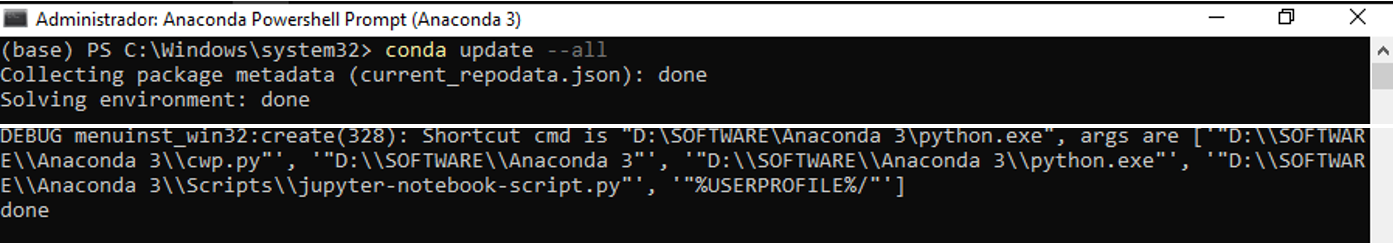

In [116]:
Image("actualizar.png")

Al ejecutar Anaconda nos encontraremos con la siguiente Interfaz gráfica, en ella encontraremos diferentes herramientas que podemos utilizar según el área de desarrollo de software que estemos trabajando como lo puede ser Visión por Computador, Bases de datos, desarrollo Web, Entrenamiento de Inteligencia artificial y Big Data.

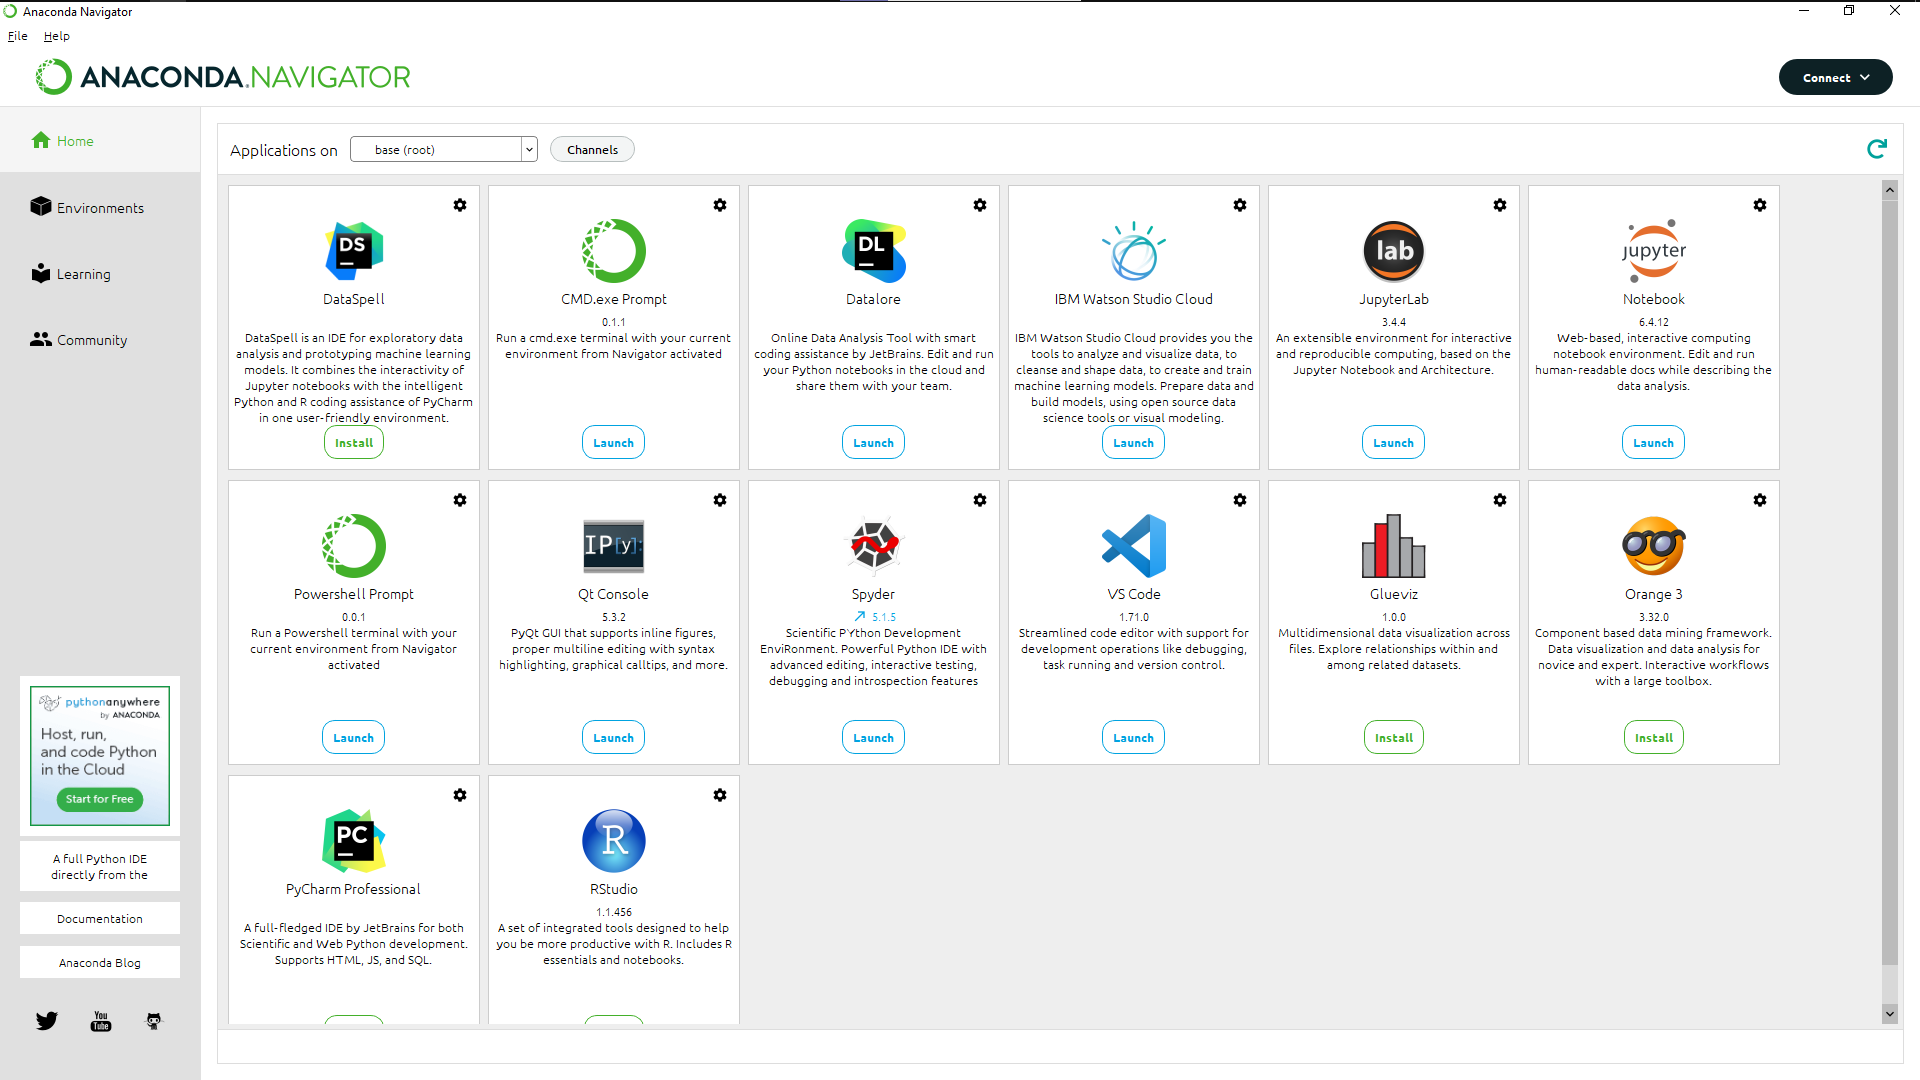

In [121]:
Image("anaconda.png")

La herramienta que nos compete hoy es Jupiter Notebook, un ambiente de cuaderno de programación dedicado para el lenguaje de Python en su versión I-Python. Al ejecutar esta herramienta se nos desplegara en el navegador que tengamos configurado como predeterminado en nuestro ordenador. Frente a nosotros estará un menú de navegación de nuestro disco Duro C (no permite acceder a otras localizaciones de diferentes unidades de almacenamiento que no sean la principal, por lo que se sugiere crear una carpeta dedicada en el Disco C donde almacenar los códigos que estamos utilizando.

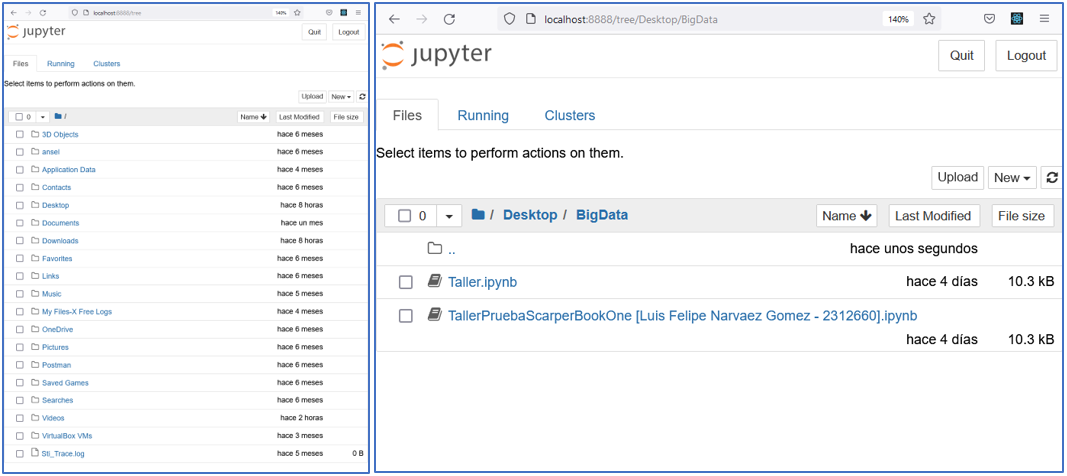

In [122]:
Image("jupyter.png")

Ahora ubiquemos la página web a la que queremos hacerle un scraping de sus elementos. La página que escogeré es la siguiente: https://books.toscrape.com/index.html

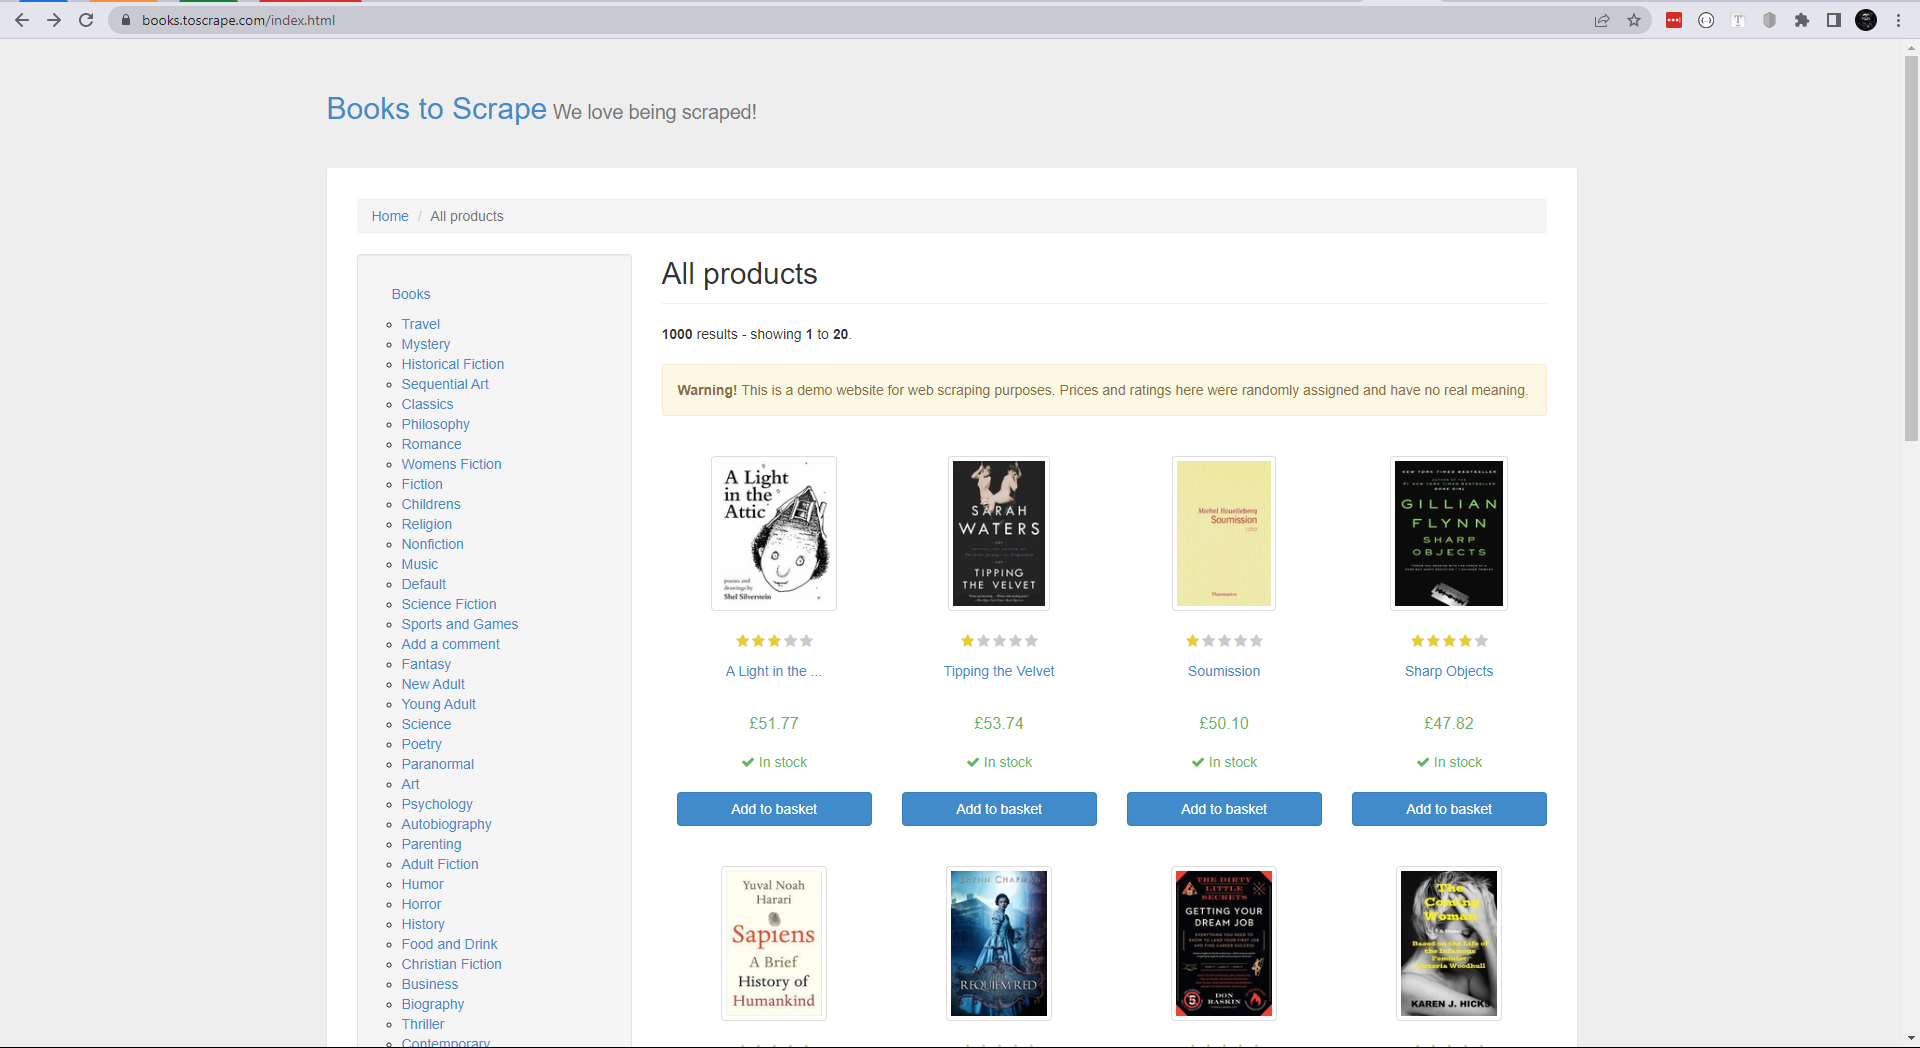

In [123]:
Image("booksweb.png")

Ahora ubicaremos las partes que queremos tomar de cada elemento de la pagina, en este caso seleccionaremos los siguientes:

1.	Título del Libro
2.	Precio del libro
3.	Stock disponible del libro
4.	Valoración del libro
5.	Imagen el libro

Para Lograr debemos localizar cada sección del libro en su código HTML, el componente que necesitamos como tal y no el elemento en individual. Para hacer esto, dentro de la página damos [CTRL]+[SHIFT]+[I] y seleccionaremos la pestaña de la barra de menús de Elements para ver el código que necesitamos. Podemos ayudarnos de la herramienta del puntero de la esquina superior izquierda de Inspeccionar.


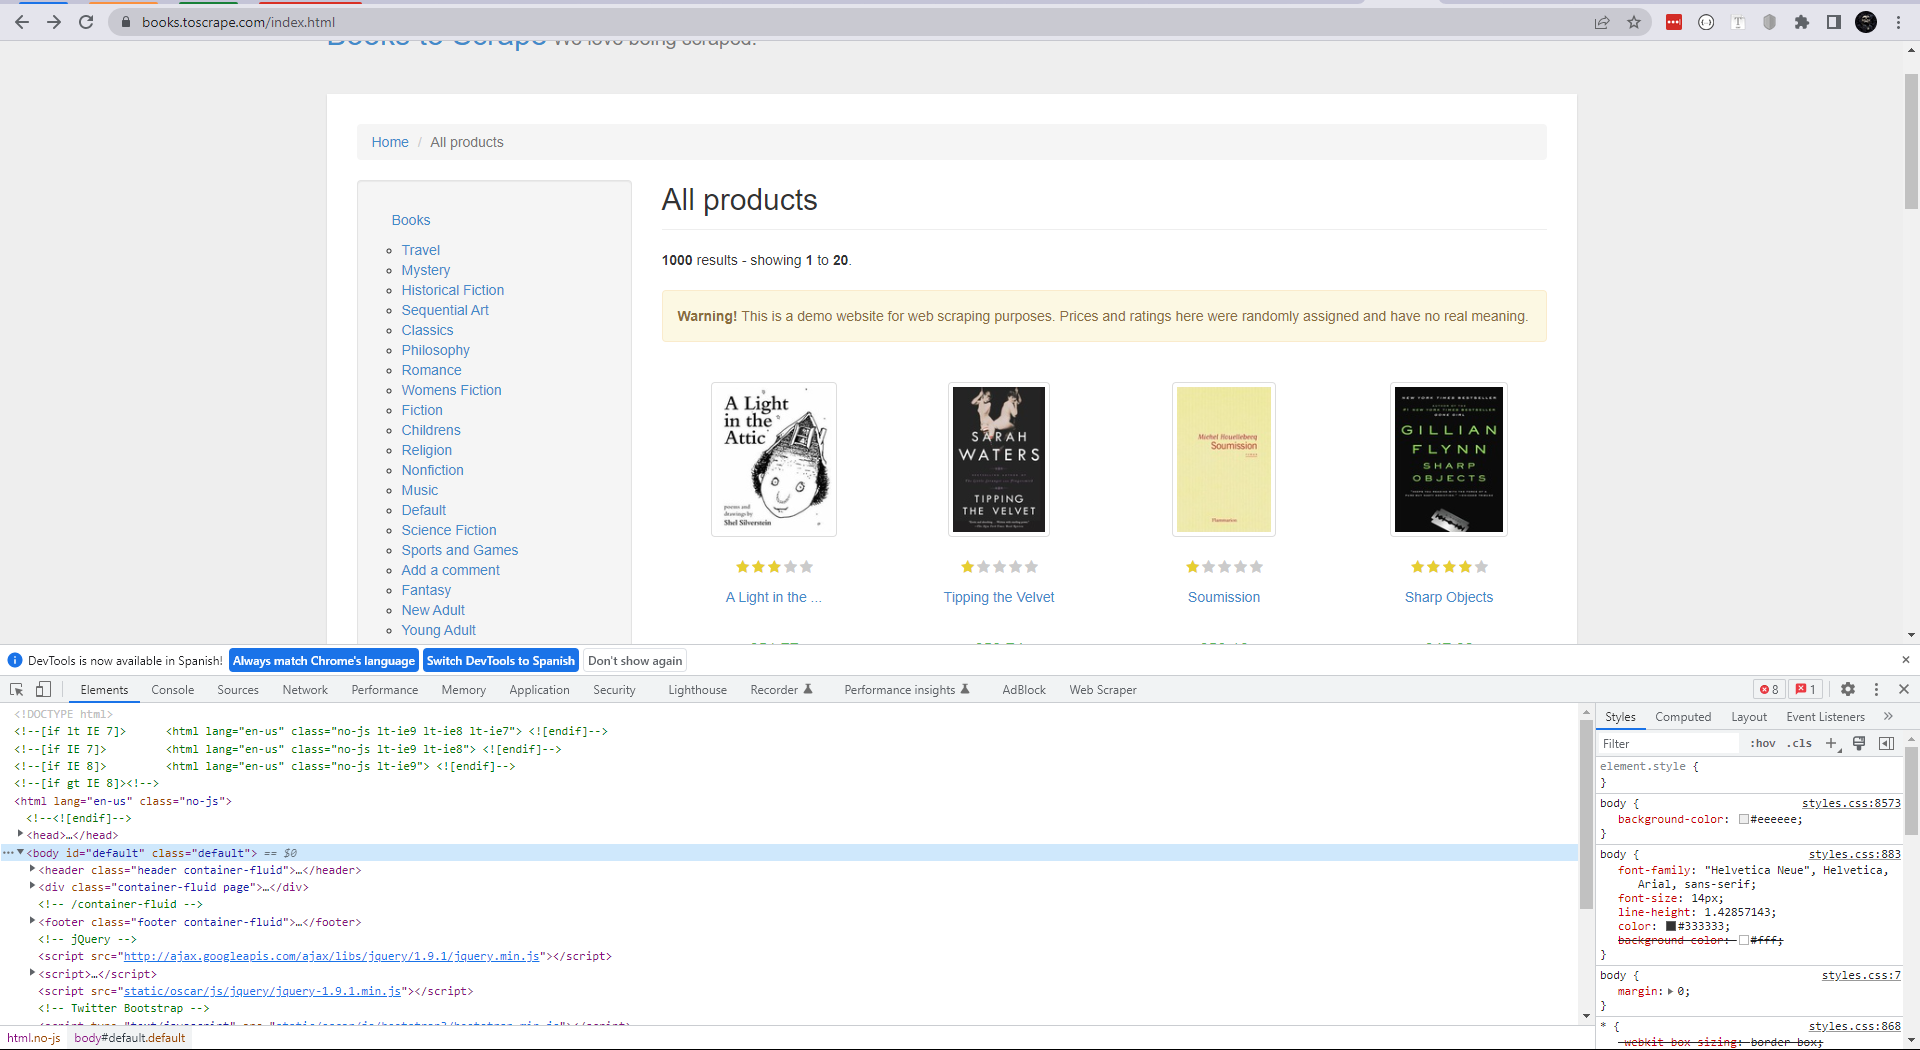

In [124]:
Image("ctrlI.png")

El TITULO DEL LIBRO tendría la siguiente forma:

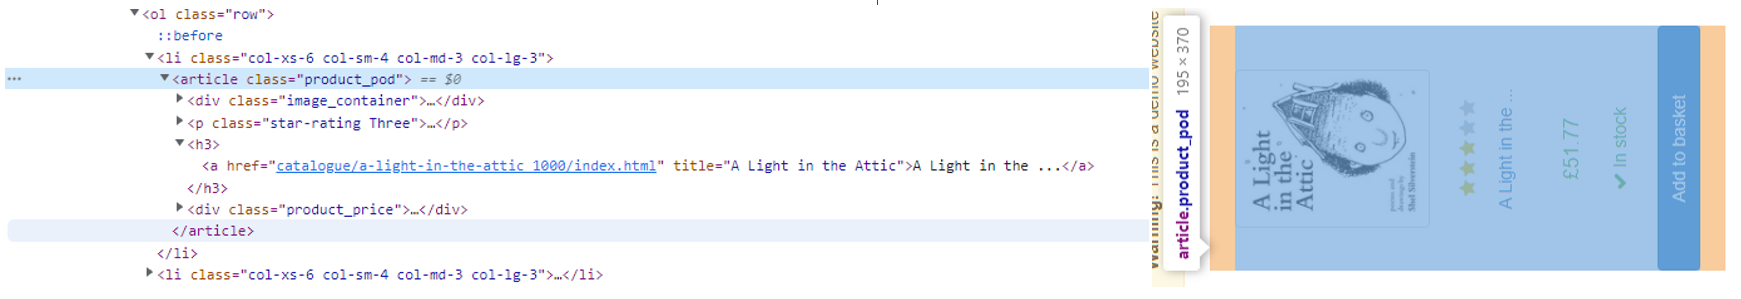

In [125]:
Image("1.png")

Esto traducido a la variable que necesitamos seria:
//article[@class=”producto_pod”]//h3/a/text()

El PRECIO DEL LIBRO tendría la siguiente forma:

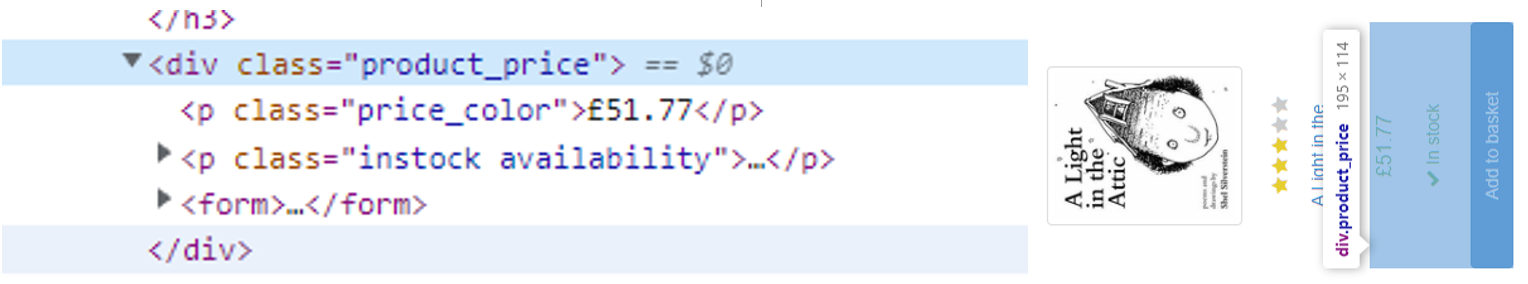

In [127]:
Image("2.png")

Esto traducido a la variable que necesitamos en Python seria:
//div[@class=”producto_price”]/p[@class=”price_color”]/text()

Para ver si aun el libro se encuentra en STOCK tenemos la siguiente forma:

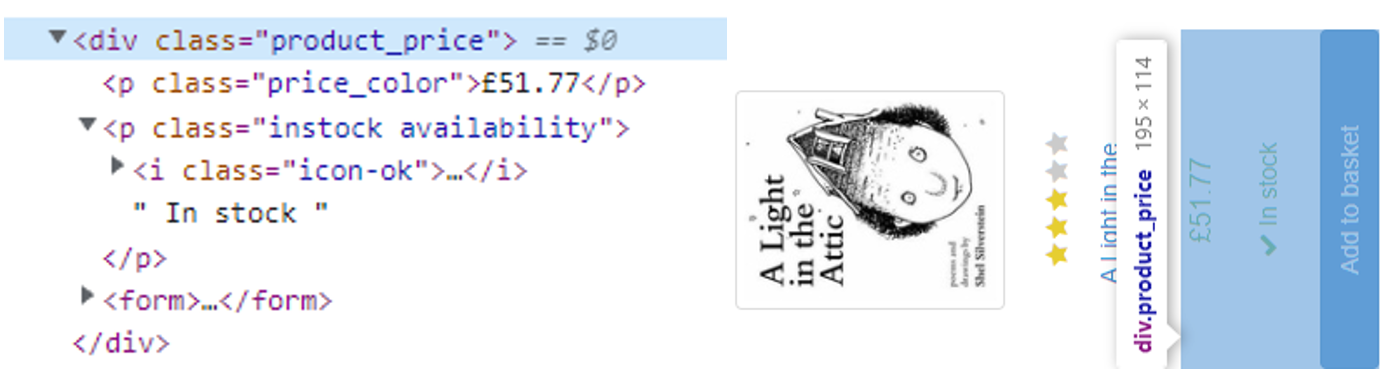

In [128]:
Image("3.png")

Esto traducido a la variable que necesitamos en Python seria:
//div[@class=”producto_price”]//p[@class=”instock availability”]/text()

Para ver la VALORACIÓN DEL LIBRO tenemos una sucesión de formas distintas dependiendo el grado de estrellas en color correspondientes al libro, esto de la siguiente manera:

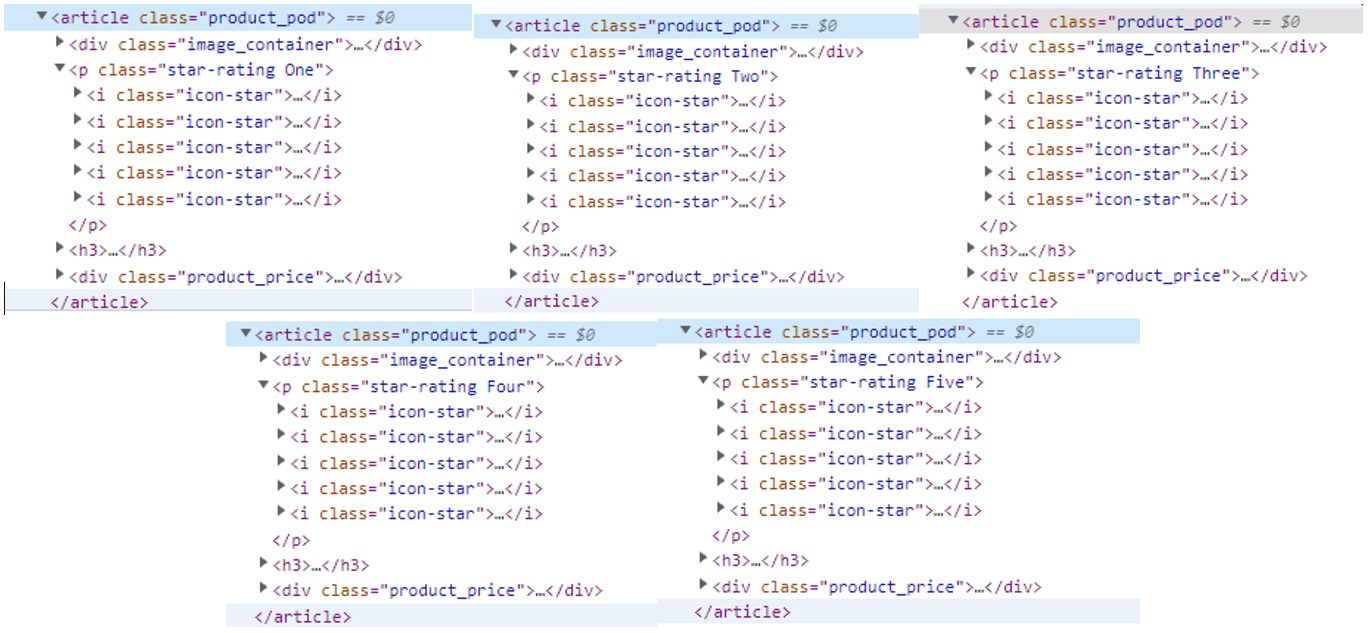

In [129]:
Image("4.png")

Obteniendo formas como:

//article[@class=”producto_pod”]//p[@class=”star-rating One”]/…
//article[@class=”producto_pod”]//p[@class=”star-rating Two”]/…
//article[@class=”producto_pod”]//p[@class=”star-rating three”]/…
//article[@class=”producto_pod”]//p[@class=”star-rating Four”]/…
//article[@class=”producto_pod”]//p[@class=”star-rating Five”]/…

Para ver la IMAGEN DEL LIBRO tenemos la siguiente forma:

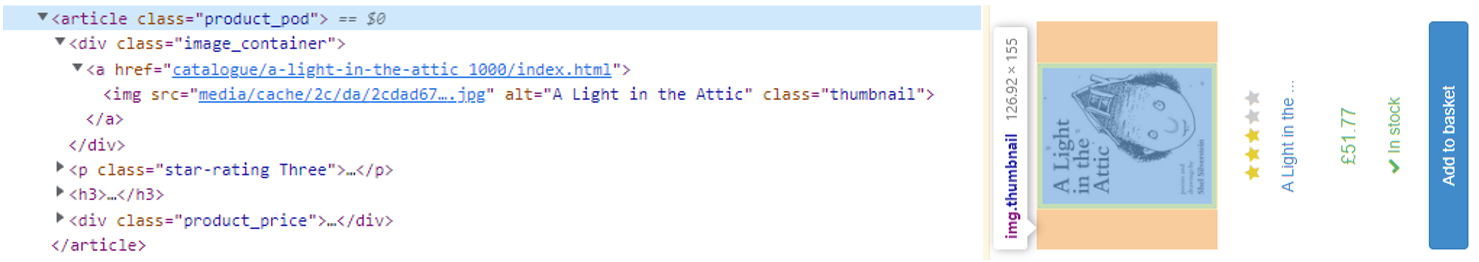

In [130]:
Image("5.png")

Con esto Tendríamos una forma similar a:

//article[@class=”producto_pod”]/div[@class=”image_container”]/a/img[@class=”thumbnail”]/…

Al observar las etiquetas de imagen vemos que existe un patrón dentro de los enlaces, que podemos aprovechar para a recuperación del link de la imagen. El patrón estaría implícito así:

…
…src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"…
…src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"…
…src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"…
…src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"…
…


Teniendo en cuenta las tarjetas de información de cada una de las partes que necesitamos dentro de la pagina web, podemos alterar un poco nuestras XPATH con la finalidad de obtener información. La misma no necesariamente tiene que tener solo la data que necesitamos, puede estar acompañada por texto o caracteres extraños, sin embargo, mientras la información este entre esa data la podemos rescatar al hacer un proceso posterior de limpieza del dataframe.

In [33]:
# Instalar Librerias

# pip install requests
# pip install lxml
# pip pandas
# pip install 

# Este proceso se hace dentro de la consola o prom de anaconda

In [114]:
# Importar librerias

import requests
import lxml.html as html
import pandas as pd

from bs4 import BeautifulSoup
import urllib.request
from IPython.display import Image

In [35]:
url_father='https://books.toscrape.com/index.html'

In [36]:
# Definimos ahora lo que ya hemos hecho pero en una funcion

def get_urls(url_father):
    root_url = 'https://books.toscrape.com/'
    
    links_categorias ='//ul[@class="nav nav-list"]/li//ul/li/a/@href'
    
    r = requests.get(url_father)
    home = r.content.decode('utf-8')
    parser = html.fromstring(home)
    
    categorias_url = parser.xpath(links_categorias)
    categorias_url = [root_url + x for x in categorias_url]
    
    return categorias_url

In [68]:
# Definicion para obtener e contenido

def parser_content(url):
    dictionary_content={}
    
    r = requests.get(url)
    home = r.content.decode('utf-8')
    parser = html.fromstring(home)
    
    if r.status_code==200:
        #obtener tirulos de libro
        tittle = '//article[@class="product_pod"]//h3/a/text()'
        tittle_book = parser.xpath(tittle)
        dictionary_content['BookTittle'] = tittle_book
        
        #obtener precios
        price = '//div[@class="product_price"]/p[@class="price_color"]/text()'
        price_book = parser.xpath(price)
        dictionary_content['BookPrice'] = price_book
        
        #obtener stock
        stock = '//article[@class="product_pod"]/div[@class="product_price"]/p[@class="instock availability"]/@class'
        stock_book = parser.xpath(stock)
        dictionary_content['BookStock'] = stock_book
        
        #obtener calificacion
        qua  = '//article[@class="product_pod"]/p/@class'
        qualification = parser.xpath(qua)
        dictionary_content['QualificationBook'] = qualification

        #obtener imagenes
        img = '//article[@class="product_pod"]/div[@class="image_container"]/a/img/@src'
        img_book = parser.xpath(img)
        dictionary_content['BookImage'] = img_book
        
        
    return dictionary_content

In [69]:
# ejecutamos las funciones 
get_links = get_urls(url_father)
len(get_links)

50

In [70]:
# ahora exportemos la data

data=[]
for indx, i in enumerate(get_links):
    # print(f"Scrapeando pagina: {indx+1}")
    data.append(parser_content(i))
    
print('Scrapeo Finalizado')

Scrapeo Finalizado


In [71]:
print(data)

[{'BookTittle': ["It's Only the Himalayas", 'Full Moon over Noah’s ...', 'See America: A Celebration ...', 'Vagabonding: An Uncommon Guide ...', 'Under the Tuscan Sun', 'A Summer In Europe', 'The Great Railway Bazaar', 'A Year in Provence ...', 'The Road to Little ...', 'Neither Here nor There: ...', '1,000 Places to See ...'], 'BookPrice': ['£45.17', '£49.43', '£48.87', '£36.94', '£37.33', '£44.34', '£30.54', '£56.88', '£23.21', '£38.95', '£26.08'], 'BookStock': ['instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability', 'instock availability'], 'QualificationBook': ['star-rating Two', 'star-rating Four', 'star-rating Three', 'star-rating Two', 'star-rating Three', 'star-rating Two', 'star-rating One', 'star-rating Four', 'star-rating One', 'star-rating Three', 'star-rating Five'], 'BookImage': ['../../../.

In [91]:
df = pd.DataFrame()

for j in data:
    df_one = pd.DataFrame(j)
    df = pd.concat([df,df_one])

df.head()

,BookTittle,BookPrice,BookStock,QualificationBook,BookImage
0,It's Only the Himalayas,£45.17,instock availability,star-rating Two,../../../../media/cache/27/a5/27a53d0bb95bdd88...
1,Full Moon over Noah’s ...,£49.43,instock availability,star-rating Four,../../../../media/cache/57/77/57770cac1628f440...
2,See America: A Celebration ...,£48.87,instock availability,star-rating Three,../../../../media/cache/9a/7e/9a7e63f12829df4b...
3,Vagabonding: An Uncommon Guide ...,£36.94,instock availability,star-rating Two,../../../../media/cache/d5/bf/d5bf0090470b0b8e...
4,Under the Tuscan Sun,£37.33,instock availability,star-rating Three,../../../../media/cache/98/c2/98c2e95c5fd1a4e7...


In [97]:
# copia de seguridad dataframe original
df_original = df.copy()
df_original.head(1)

,BookTittle,BookPrice,BookStock,QualificationBook,BookImage
0,It's Only the Himalayas,£45.17,instock availability,star-rating Two,../../../../media/cache/27/a5/27a53d0bb95bdd88...


In [106]:
# copia para transformar
df_trans = df.copy()

df_trans['Stock'] = df_trans['BookStock'].replace('instock availability','availability')
df_trans.drop(['BookStock'], axis=1, inplace=True)

df_trans['Price £'] = df_trans['BookPrice'].replace('\£','', regex=True).astype(float)
df_trans.drop(['BookPrice'], axis=1, inplace=True)

df_trans['Score'] = df_trans['QualificationBook'].replace('star-rating ','', regex=True)
df_trans.drop(['QualificationBook'], axis=1, inplace=True)

df_trans['Image'] = df_trans['BookImage'].replace('../../../../','',regex=True)
df_trans.drop(['BookImage'],axis=1, inplace=True)

df_trans.head()

,BookTittle,Stock,Price £,Score,Image
0,It's Only the Himalayas,availability,45.17,Two,media/cache/27/a5/27a53d0bb95bdd88288eaf66c923...
1,Full Moon over Noah’s ...,availability,49.43,Four,media/cache/57/77/57770cac1628f4407636635f4b85...
2,See America: A Celebration ...,availability,48.87,Three,media/cache/9a/7e/9a7e63f12829df4b43b31d110bf3...
3,Vagabonding: An Uncommon Guide ...,availability,36.94,Two,media/cache/d5/bf/d5bf0090470b0b8ea46d9c166f78...
4,Under the Tuscan Sun,availability,37.33,Three,media/cache/98/c2/98c2e95c5fd1a4e7cd5f2b63c528...


In [111]:
# Exportar el dataframe en JSON
my_data = df_trans.to_json(orient='records')
my_file = open('./webScrapingWithIpython.json','w')
my_file.write(my_data)
my_file.close()

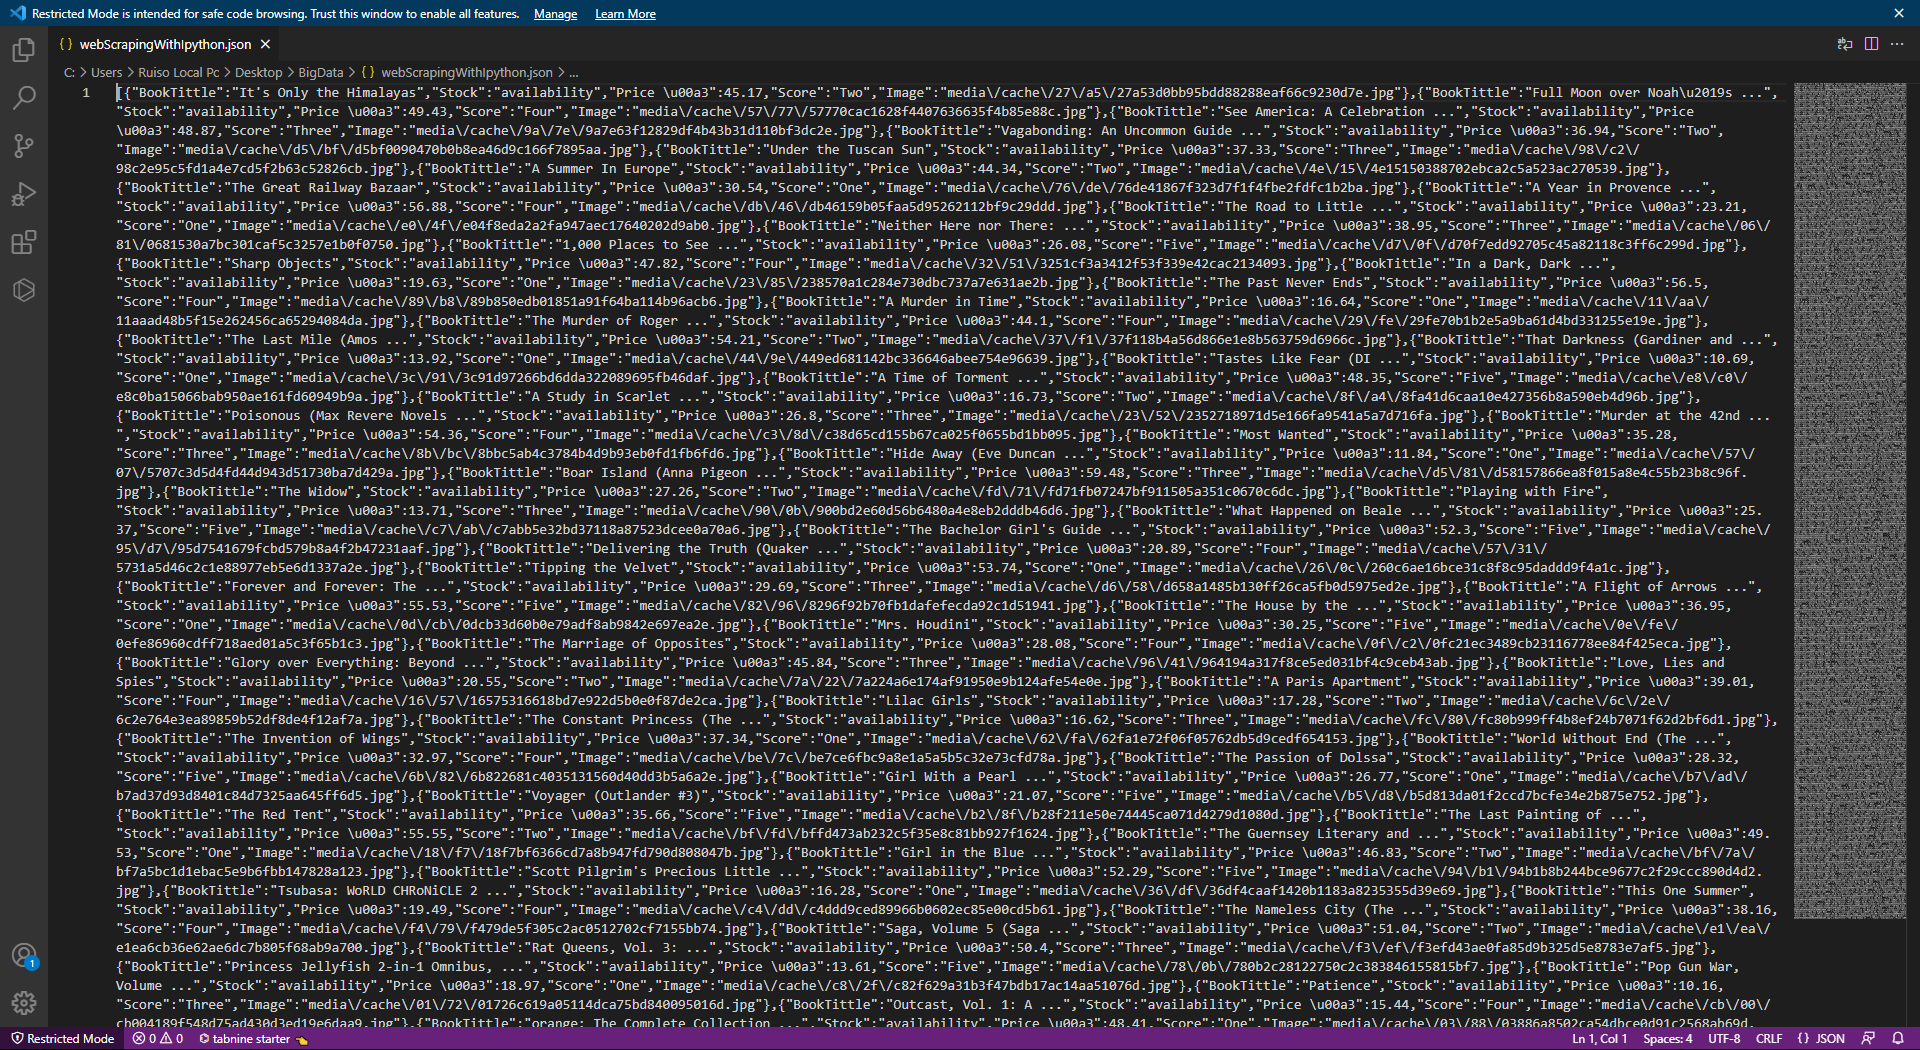

In [115]:
Image("json.png")

Ahora subamoslo a Mongo DB.

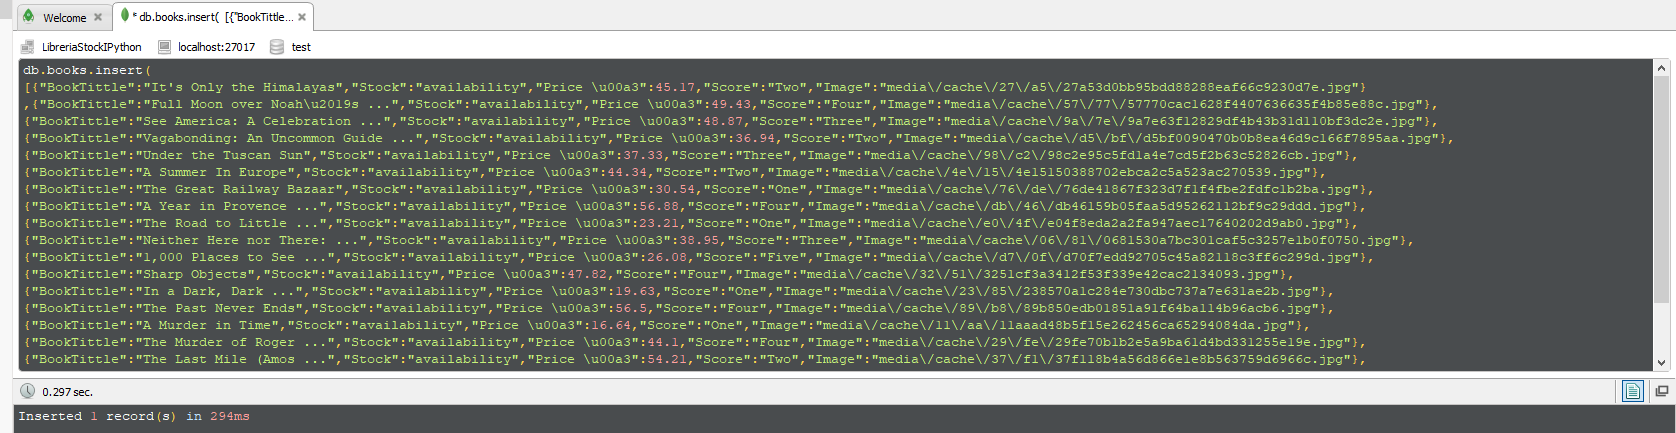

In [131]:
Image("mongo.png")

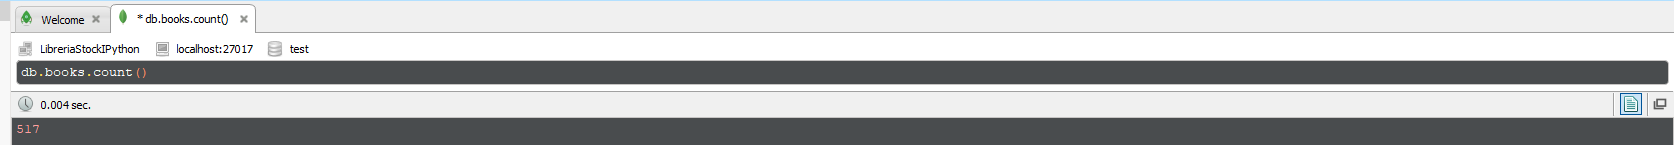

In [133]:
Image("mongo1.png")

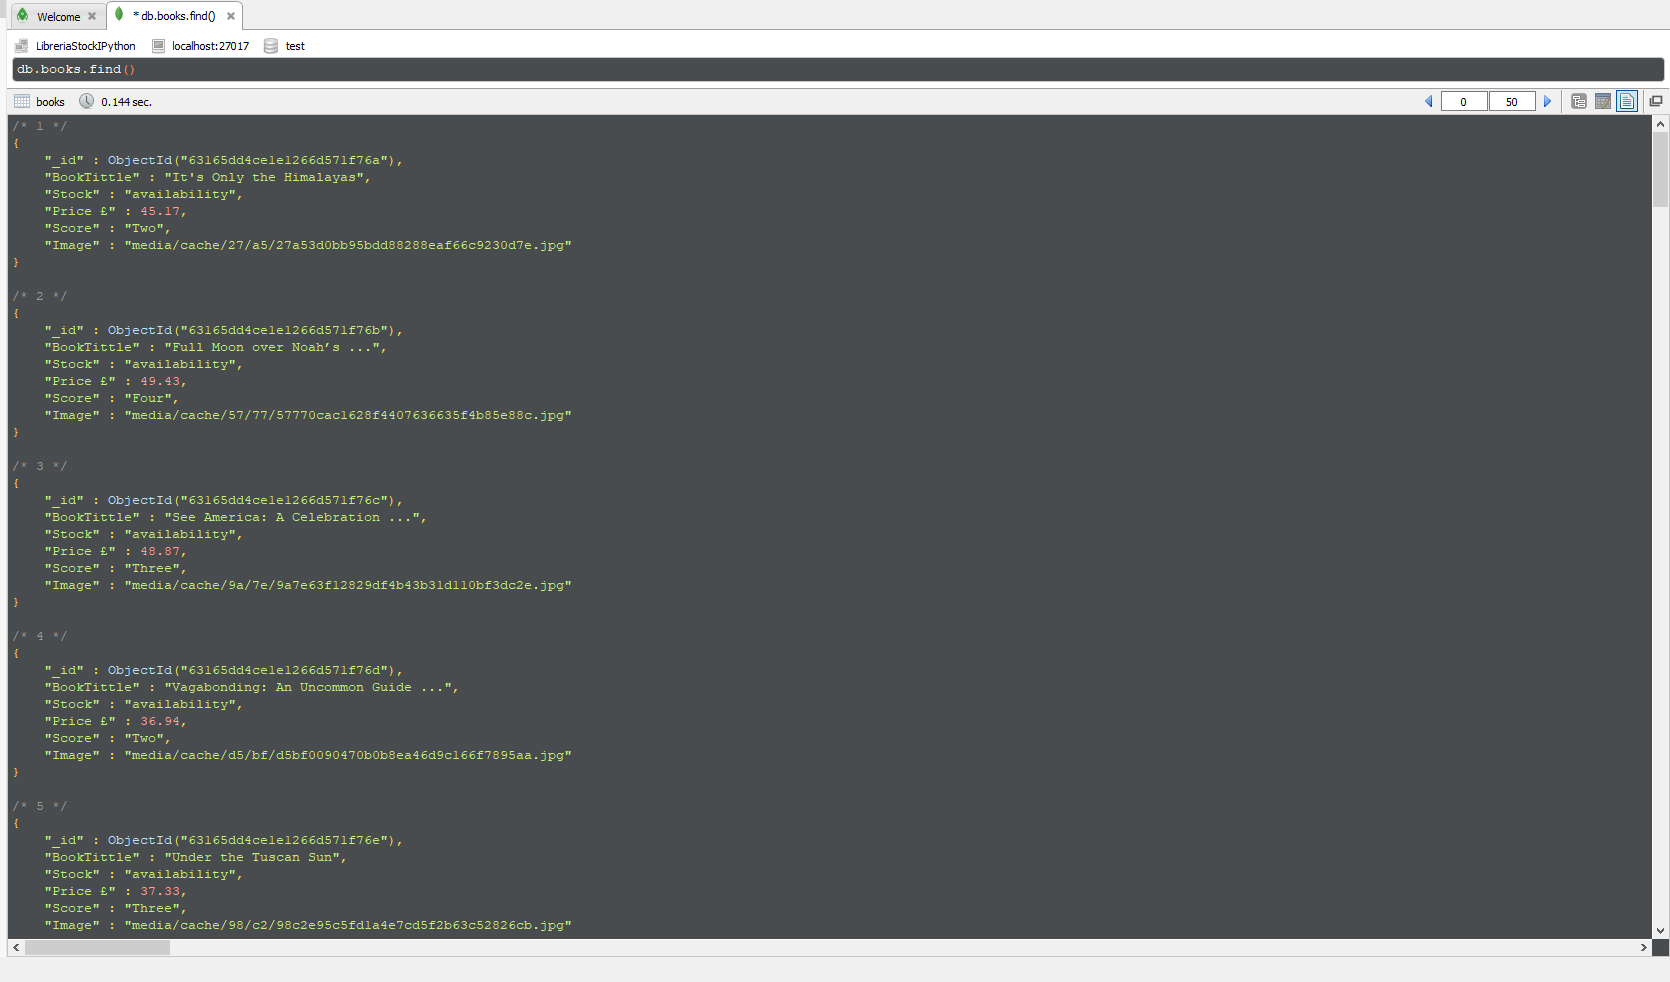

In [134]:
Image("mongo2.png")

### Zona de pruebas

In [ ]:
def get_images():
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

    source = requests.get(url_father ,headers = headers).text
    soup = BeautifulSoup(source,'lxml')

    Images = []
    img_links = soup.select('img[src^="media/cache/"]')
    #print(img_links[0])
    Images.append(img_links[]['src'])
    #print(Images)
    
    return Images
""""
for i in range(len(img_links)):
    Images.append(img_links[i]['src'])

#print(Images)
#return Images"""

In [67]:
# zona de pruebas
url_father='https://books.toscrape.com/index.html'
r = requests.get(url_father)
home = r.content.decode('utf-8')
parser = html.fromstring(home)

"""
Score=[]

if(qua  == '//article[@class="product_pod"]/p[@class="star-rating One"]/@class'):
    qualification = parser.xpath(qua)
    for i in range (len(qualification)):
        Score.append(qualification[i])
elif(qua  == '//article[@class="product_pod"]/p[@class="star-rating Two"]/@class'):
    qualification = parser.xpath(qua)
    for i in range (len(qualification)):
        Score.append(qualification[i])
elif(qua  == '//article[@class="product_pod"]/p[@class="star-rating Three"]/@class'):
    qualification = parser.xpath(qua)
    for i in range (len(qualification)):
        Score.append(qualification[i])
elif(qua  == '//article[@class="product_pod"]/p[@class="star-rating Four"]/@class'):
    qualification = parser.xpath(qua)
    for i in range (len(qualification)):
        Score.append(qualification[i])
elif(qua  == '//article[@class="product_pod"]/p[@class="star-rating Five"]/@class'):
    qualification = parser.xpath(qua)
    for i in range (len(qualification)):
        Score.append(qualification[i])

print(Score)
"""
qua  = '//article[@class="product_pod"]/p/@class'
qualification = parser.xpath(qua)
print(qualification)

['star-rating Three', 'star-rating One', 'star-rating One', 'star-rating Four', 'star-rating Five', 'star-rating One', 'star-rating Four', 'star-rating Three', 'star-rating Four', 'star-rating One', 'star-rating Two', 'star-rating Four', 'star-rating Five', 'star-rating Five', 'star-rating Five', 'star-rating Three', 'star-rating One', 'star-rating One', 'star-rating Two', 'star-rating Two']
